In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn import cross_validation
from sklearn.cross_validation import KFold
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import train_test_split
from itertools import combinations
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

---
#Homework Solution
##There are no 'right' answers, but this is one possible solution
---

In [2]:
df = pd.read_csv('/Users/mrgholt/GADS-22-NYC/Datasets/Hitters.csv')

In [3]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N


In [4]:
df.dropna(inplace = True)

In [5]:
df.League = pd.factorize(df.League)[0]
df.Division = pd.factorize(df.Division)[0]
df.NewLeague = pd.factorize(df.NewLeague)[0]

In [6]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,0,0,632,43,10,475.0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,1,0,880,82,14,480.0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,0,1,200,11,3,500.0,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,0,1,805,40,4,91.5,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,1,0,282,421,25,750.0,1


In [7]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,0.528517,0.490494,290.711027,118.760456,8.593156,535.925882,0.536122
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,0.500138,0.500863,279.934575,145.080577,6.606574,451.118681,0.499644
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67.500000,0.000000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,0.000000,0.000000,113.500000,8.000000,3.000000,190.000000,0.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,1.000000,0.000000,224.000000,45.000000,7.000000,425.000000,1.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,1.000000,1.000000,322.500000,192.000000,13.000000,750.000000,1.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1.000000,1.000000,1377.000000,492.000000,32.000000,2460.000000,1.000000


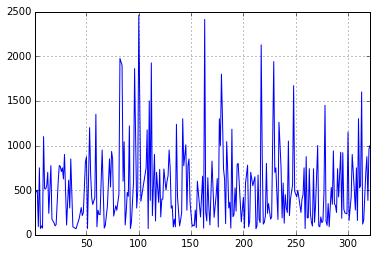

In [8]:
df.Salary.plot()

In [9]:
predictors = list(df.columns.values)
predictors.remove('Salary')
print predictors

['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'CAtBat', 'CHits', 'CHmRun', 'CRuns', 'CRBI', 'CWalks', 'League', 'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague']


---
#Scaling the data
##I used zero mean, unit std dev
---

In [10]:
scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit(df)
df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

In [11]:
df_scaled.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
count,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,2.630000e+02,263.000000,2.630000e+02,2.630000e+02,2.630000e+02
mean,1.013131e-17,5.741077e-17,3.377104e-17,-5.065656e-17,1.215758e-16,1.688552e-18,-5.403367e-17,6.078788e-17,6.754209e-17,5.403367e-17,3.377104e-17,4.052525e-17,1.080673e-16,1.013131e-16,1.080673e-16,7.429629e-17,0.000000,1.046902e-16,1.519697e-16,-4.390236e-17
std,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907e+00,1.001907,1.001907e+00,1.001907e+00,1.001907e+00
min,-2.616138e+00,-2.371896e+00,-1.329426e+00,-2.147612e+00,-1.993023e+00,-1.896692e+00,-1.319217e+00,-1.156124e+00,-1.110083e+00,-8.439610e-01,-1.086676e+00,-1.014457e+00,-9.837330e-01,-1.058758e+00,-9.811659e-01,-1.040476e+00,-0.820143,-1.303178e+00,-1.040345e+00,-1.075052e+00
25%,-8.239485e-01,-8.066016e-01,-7.573725e-01,-8.334341e-01,-8.317388e-01,-8.356459e-01,-6.921917e-01,-7.952934e-01,-7.885827e-01,-6.611260e-01,-7.735785e-01,-7.294084e-01,-7.181322e-01,-1.058758e+00,-9.811659e-01,-6.342514e-01,-0.764897,-8.482187e-01,-7.682799e-01,-1.075052e+00
50%,6.364424e-02,-1.072148e-01,-2.997299e-01,-1.076939e-01,-1.736775e-01,-1.897920e-01,-2.741747e-01,-3.183479e-01,-3.186972e-01,-3.564009e-01,-3.364525e-01,-3.111310e-01,-3.273195e-01,9.445032e-01,-9.811659e-01,-2.387637e-01,-0.509380,-2.416068e-01,-2.463595e-01,9.301872e-01
75%,8.322111e-01,7.475913e-01,7.299662e-01,7.161194e-01,7.553501e-01,7.328565e-01,5.618594e-01,5.402415e-01,5.128764e-01,2.835218e-01,4.122581e-01,2.914983e-01,2.588995e-01,9.445032e-01,1.019196e+00,1.137751e-01,0.505782,6.683110e-01,4.754453e-01,9.301872e-01
max,1.927249e+00,2.890157e+00,3.247001e+00,2.952184e+00,2.690824e+00,2.947213e+00,3.487979e+00,4.993120e+00,5.462131e+00,5.835613e+00,5.456601e+00,4.116413e+00,4.954343e+00,9.445032e-01,1.019196e+00,3.887909e+00,2.577541,3.549717e+00,4.273249e+00,9.301872e-01


---
##How do the features correlate with salary?
---

In [12]:
df_scaled[predictors].corrwith(df_scaled.Salary).sort(ascending = False, inplace = False)

CRBI         0.566966
CRuns        0.562678
CHits        0.548910
CAtBat       0.526135
CHmRun       0.524931
CWalks       0.489822
RBI          0.449457
Walks        0.443867
Hits         0.438675
Runs         0.419859
Years        0.400657
AtBat        0.394771
HmRun        0.343028
PutOuts      0.300480
Division     0.192514
Assists      0.025436
League       0.014282
NewLeague    0.002834
Errors      -0.005401
dtype: float64

---
##A brute force approach
###But limit the number of features for which we produce combinations for!!
---

In [30]:
#Introduce a new parameter 'max_num_features_to_try', so as to limit the number of features this function will
#use as a argument into combinations

def brute_force(data, target_variable, predictors, model, alpha_list = [1.0], degree_list = [3],
                max_num_features_to_try = 3):
    ''' brute_force is a simple function designed to:
    test every combination of predictors submitted in the predictors argument
    test all degrees of polynomial as submitted in the degree_list argument
    test a number of regularization parameters as submitted in the alpha_list argument
    
    model is the algorithm to be tested
     '''
    min_mse = 1e99
    test_size_split = 0.5

    #search over every combination of the predictors - using the itertools functionality
    for i in xrange(1, max_num_features_to_try + 1):
        #it's not a bad idea to put an indicator of progress into the code
        print '.',
        
        #build and test a model for each combination of predictors
        for j in combinations(predictors, i):
            
            test_predictors = list(j)
            
            #use train test split to get the training and test datasets, according to the parameter test_size_split
            X_train, X_test, y_train, y_test = train_test_split(data[test_predictors], \
                                                    data[target_variable], test_size=test_size_split, random_state=42)
            
            #Now search over all the polynomial degrees in the degree_list
            for degree in degree_list:
                
                #Make sure each model is regularized, and search over all alphas in the regularization list
                for a in alpha_list:
                    
                    #build the model - all parameteres being determined using the training data
                    clf = make_pipeline(PolynomialFeatures(degree), model(alpha = a))
                    dummy = PolynomialFeatures(degree).fit_transform(X_train)
                    
                    #fit the model
                    clf.fit(X_train, y_train)
                    
                    #Get the test set predictions
                    y_hat = clf.predict(X_test)
                    
                    #measure the mean squared error of the test set
                    mse = mean_squared_error(y_hat, y_test)
                    
                    #remember ALL information for the minimum
                    if mse < min_mse:
                        min_mse = mse
                        min_clf = clf
                        min_predictors = test_predictors
                        min_degree = degree
                        min_alpha = a
                        #unless you cannot afford to do this, it is always a good idea to remember the train, test
                        #datasets actually used to build your model
                        min_X_train = X_train
                        min_y_train = y_train
                        min_X_test = X_test
                        min_y_test = y_test
                        input_dimension = dummy.shape[1]
                    
    #return a tuple for the minimum model and parameters
    return (min_mse, min_clf, min_predictors, min_degree, min_alpha, 
            min_X_train, min_y_train, min_X_test, min_y_test, input_dimension)

def print_essential_results(results):
    print "MSE = {:5.7f}".format(results[0])
    print "Best predictors = ", results[2]
    print "Input dimension = ", results[9]
    print "Optimal degree polynomial = ", results[3]
    print "Optimal regularization value = ", results[4]

def get_degree_v_mse(results, model, degree_list=[3], ylog=1.0, ylim_low = 0.0, ylim_high=1.0):
    '''get_degree_v_mse uses the results list to produce a plot of degree vs mse for the training
    and test sets'''
    
    #use the regularization parameter you found in the brute force routine
    model_alpha = results[4]

    #set up the lists to accumulate the MSE's
    training_error = []
    testing_error = []
    
    #Search through each degree in the supplied degree_list
    for degree in degree_list:
        
        #Build the model
        clf = make_pipeline(PolynomialFeatures(degree), model())
        
        #Fit the model using the training data from the brute force routine
        clf.fit(results[5], results[6])
        
        #Accumulate the mse results for the training and test sets
        training_error.append(mean_squared_error(results[6], clf.predict(results[5])))
        testing_error.append(mean_squared_error(results[8], clf.predict(results[7])))
    
    #Plot the results
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    ax.plot(np.array(degree_list), np.array(training_error), color = 'green', marker = 'o', label='Training Error')
    ax.plot(np.array(degree_list), np.array(testing_error), color = 'red', marker = 'o', label='Validation Error')
    ax.set_title("PLot of MSE vs Poylnomial Degree")
    if ylog:
        ax.set_yscale('Log')
        ax.set_ylabel('Log(MSE)')
    else:
        ax.set_ylabel('MSE')

    ax.set_ylim(ylim_low, ylim_high)
    ax.set_xlabel('Degree')
    ax.legend(loc='best')
    
def get_alpha_v_mse(results, model, alpha_list=[0.1], ylog=1.0, ylim_low = 0.0,ylim_high=1.0):
    '''get_alpha_v_mse uses the results list to produce a plot of regularization vs mse for the training
    and test sets'''
    
    #use the polynomial degree you found in the brute force routine
    max_degree = results[3]

    #set up the lists to accumulate the MSE's
    training_error = []
    testing_error = []
    
    #Search through each regularization parameter in the supplied alpha_list
    for a in alpha_list:
        
        #build the model
        clf = make_pipeline(PolynomialFeatures(max_degree), model(alpha=a))
        
        #fit the model using the training set used in the brute force routine
        clf.fit(results[5], results[6])
        
        #accumulate the mse for the training and test sets
        training_error.append(mean_squared_error(results[6], clf.predict(results[5])))
        testing_error.append(mean_squared_error(results[8], clf.predict(results[7])))
    
    
    #plot the results
    fig = plt.figure(figsize=(5,5))
    ax = plt.subplot(111)
    ax.plot(np.array(alpha_list), np.array(training_error), color = 'green', marker = 'o', label='Training Error')
    ax.plot(np.array(alpha_list), np.array(testing_error), color = 'red', marker = 'o', label='Validation Error')
    ax.set_title("PLot of Regularization vs Poylnomial Degree")
    if ylog:
        ax.set_yscale('Log')
        ax.set_ylabel('Log(MSE)')
    else:
        ax.set_ylabel('MSE')

    ax.set_ylim(ylim_low, ylim_high)
    ax.set_xscale('Log')
    ax.set_xlabel('Log Alpha')
    ax.legend(loc='best')
    
def plot_results(results):
    '''plots out the the y_test predictions (y_hat) vs the actual, known results'''
    
    mpl.style.use('ggplot')
    half_points = len(results[8])/2

    fig = plt.figure(figsize=(30, 15))
    ax = plt.subplot(311)
    ax.plot(results[8][:half_points], color = 'blue', marker='o')
    ax.plot(results[1].predict(results[7])[:half_points], color="red", marker='o')
    
    ax = plt.subplot(312)
    ax.plot(results[8][half_points:], color = 'blue', marker='o')
    ax.plot(results[1].predict(results[7])[half_points:], color="red", marker='o')
    
    max_points_to_display = 100
    yy = np.ones(len(results[8]))
    thigh = results[1].predict(results[7]) + (yy * np.sqrt(results[0]))
    tlow = results[1].predict(results[7]) - (yy * np.sqrt(results[0]))
    x_plot = np.arange(0, len(results[8]))

    ax = plt.subplot(313)
    ax.plot(results[8][:max_points_to_display], color = 'blue', marker='.')
    ax.plot(results[1].predict(results[7])[:max_points_to_display], color="red", marker='.', alpha=0.35)
    ax.fill_between(x_plot[:max_points_to_display], thigh[:max_points_to_display],\
                tlow[:max_points_to_display], color='k', alpha=.25)

In [22]:
np.logspace(-10,4, 10)

array([  1.00000000e-10,   3.59381366e-09,   1.29154967e-07,
         4.64158883e-06,   1.66810054e-04,   5.99484250e-03,
         2.15443469e-01,   7.74263683e+00,   2.78255940e+02,
         1.00000000e+04])

---
#Try Ridge
---

In [23]:
#Let's call out brute force function and see if we can find a good model
#This may take an hour or two to run with the parameters below!
#ridge_results = brute_force(df_scaled, 
#                        'Salary', 
#                        predictors, 
#                        Ridge, 
#                        alpha_list=np.logspace(-10, 4, 10), 
#                        degree_list = [2, 3, 4],
#                        max_num_features_to_try = 5)

. . . . .


In [24]:
#print_essential_results(ridge_results)

MSE = 0.3729795
Best predictors =  ['AtBat', 'Walks', 'Years', 'CRBI', 'NewLeague']
Input dimension =  126
Optimal degree polynomial =  4
Optimal regularization value =  7.74263682681


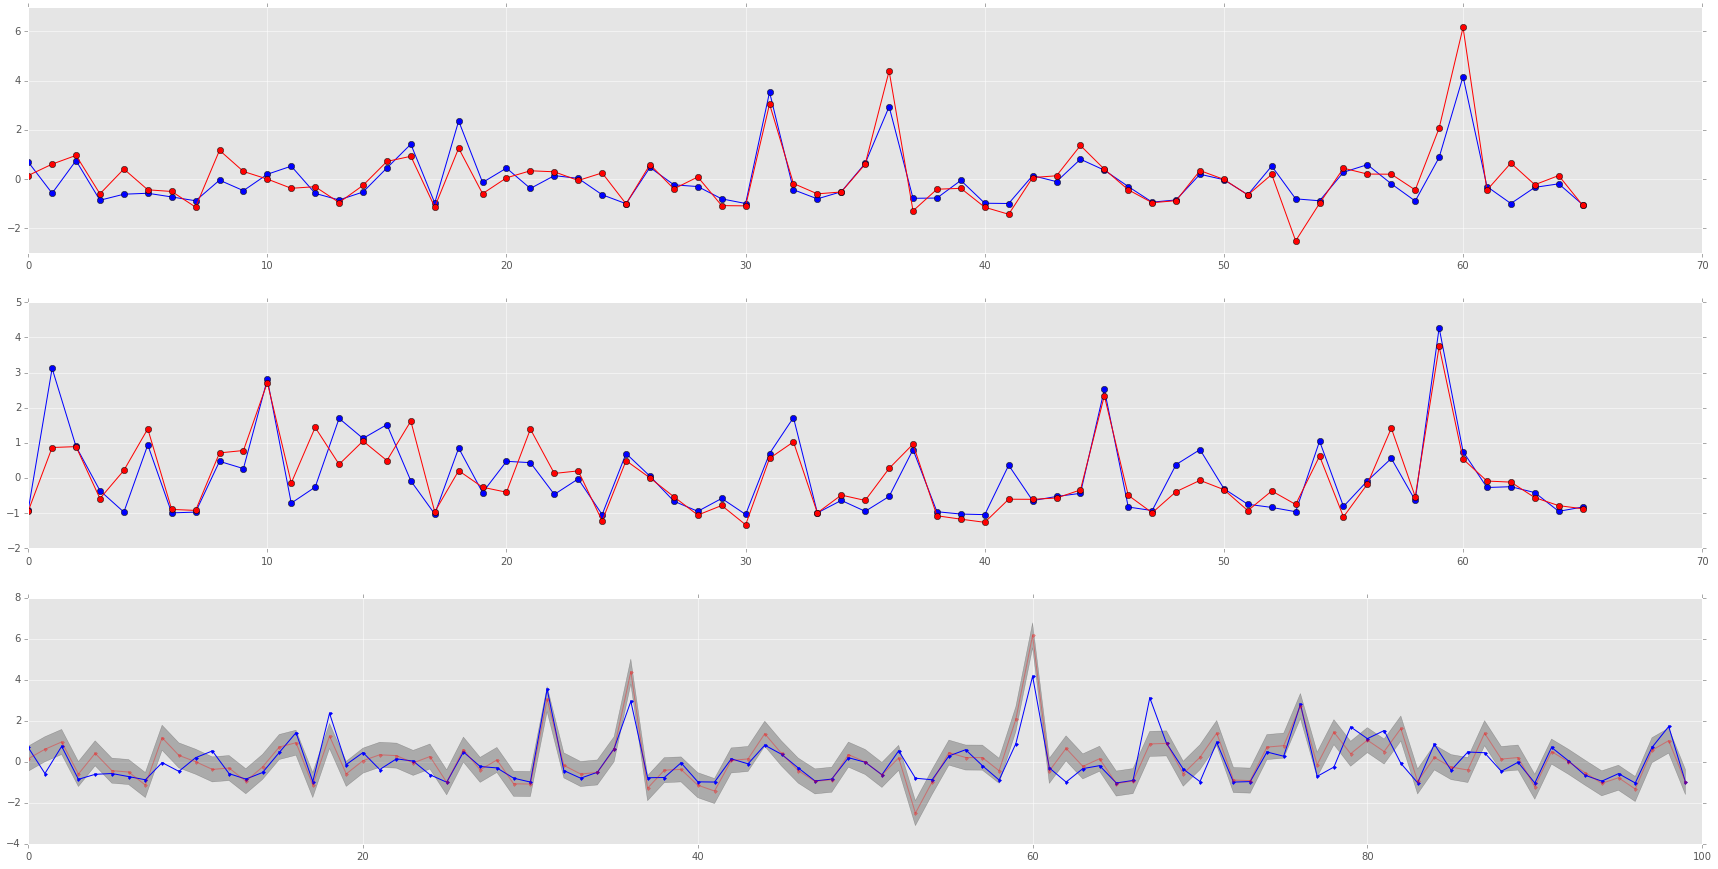

In [31]:
plot_results(ridge_results)

In [26]:
pd.DataFrame({'actual' : ridge_results[8], 'predicted' : ridge_results[1].predict(ridge_results[7])}).corr()

,actual,predicted
actual,1.000000,0.851834
predicted,0.851834,1.000000


---
#Try Lasso
---

In [27]:
#Let's call out brute force function and see if we can find a good model
#This may take an hour or two to run with the parameters below!
#lasso_results = brute_force(df_scaled, 
#                        'Salary', 
#                        predictors, 
#                        Lasso, 
#                        alpha_list=np.logspace(-10, 4, 10), 
#                        degree_list = [2,  3, 4],
#                        max_num_features_to_try = 5)

. . . . .


In [28]:
print_essential_results(lasso_results)

MSE = 0.3470978
Best predictors =  ['AtBat', 'Walks', 'Years', 'CHits', 'CRBI']
Input dimension =  126
Optimal degree polynomial =  4
Optimal regularization value =  0.00599484250319


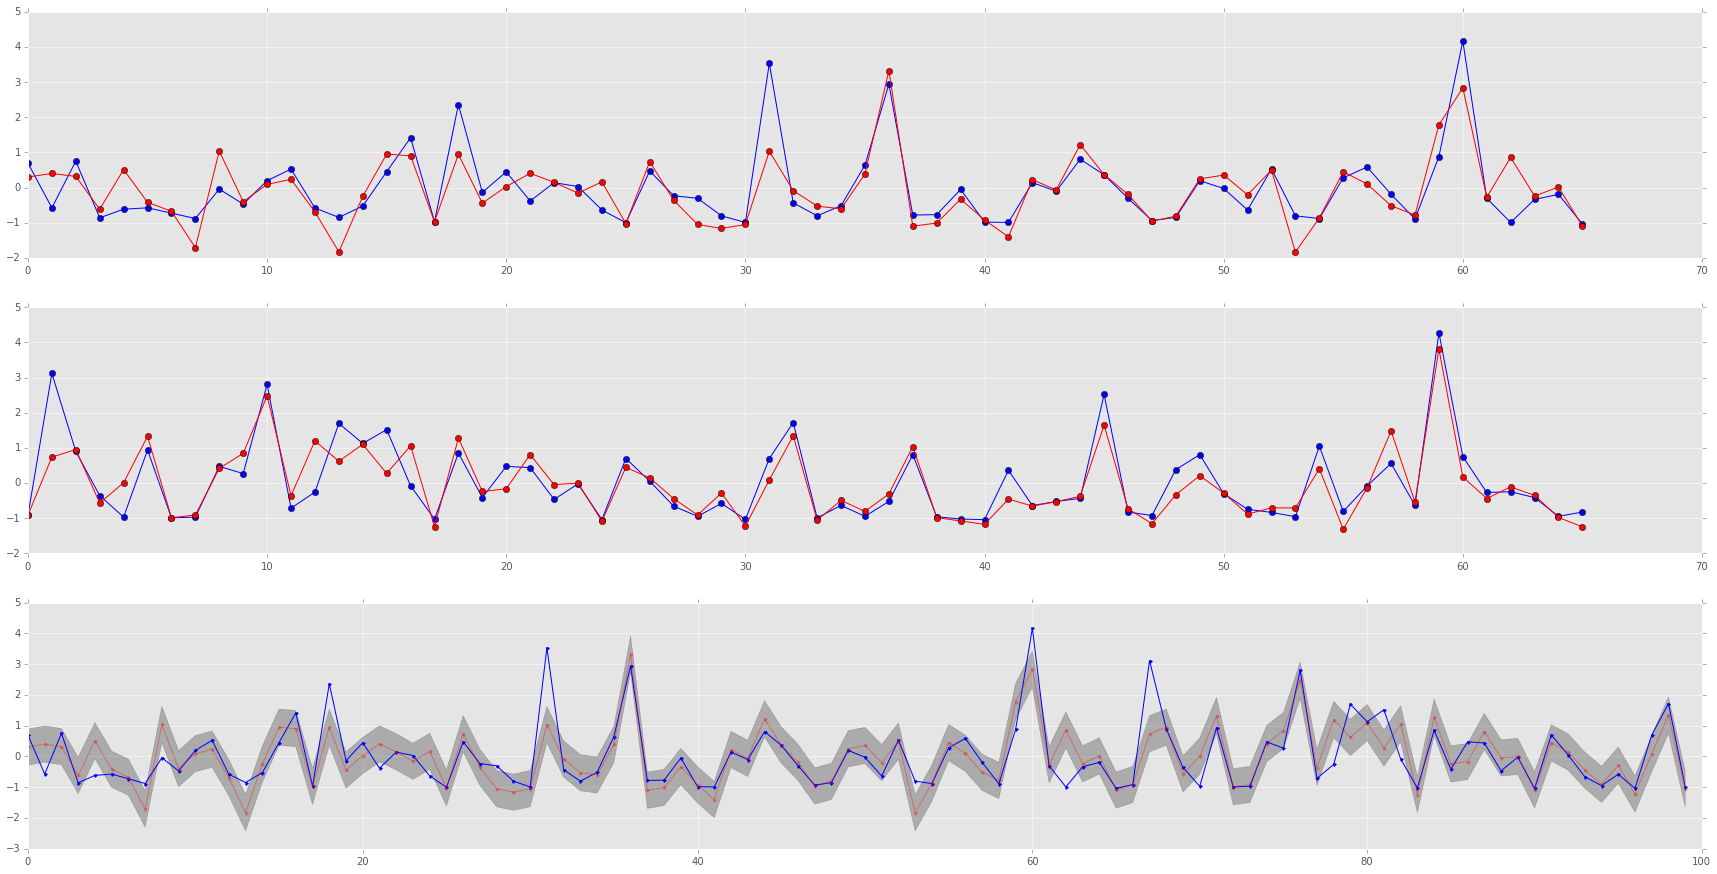

In [33]:
plot_results(lasso_results)

In [34]:
pd.DataFrame({'actual' : lasso_results[8], 'predicted' : lasso_results[1].predict(lasso_results[7])}).corr()

,actual,predicted
actual,1.000000,0.839877
predicted,0.839877,1.000000
